In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
 # Simple dataset
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Credit_Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Excellent'],
    'Buys_Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df

,Age,Income,Student,Credit_Rating,Buys_Computer
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31-40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes
5,>40,Low,Yes,Excellent,No
6,31-40,Low,Yes,Excellent,Yes
7,<=30,Medium,No,Fair,No
8,<=30,Low,Yes,Fair,Yes
9,>40,Medium,Yes,Fair,Yes


In [17]:
# Convert categorical data to numeric using pandas
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Age_<=30,Age_>40,Income_Low,Income_Medium,Student_Yes,Credit_Rating_Fair,Buys_Computer_Yes
0,True,False,False,False,False,True,False
1,True,False,False,False,False,False,False
2,False,False,False,False,False,True,True
3,False,True,False,True,False,True,True
4,False,True,True,False,True,True,True
5,False,True,True,False,True,False,False
6,False,False,True,False,True,False,True
7,True,False,False,True,False,True,False
8,True,False,True,False,True,True,True
9,False,True,False,True,True,True,True


In [6]:
X = df_encoded.drop('Buys_Computer_Yes', axis=1)
y = df_encoded['Buys_Computer_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [7]:
X

,Age_<=30,Age_>40,Income_Low,Income_Medium,Student_Yes,Credit_Rating_Fair
0,True,False,False,False,False,True
1,True,False,False,False,False,False
2,False,False,False,False,False,True
3,False,True,False,True,False,True
4,False,True,True,False,True,True
5,False,True,True,False,True,False
6,False,False,True,False,True,False
7,True,False,False,True,False,True
8,True,False,True,False,True,True
9,False,True,False,True,True,True


In [8]:
y

0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13    False
Name: Buys_Computer_Yes, dtype: bool

In [9]:
model = DecisionTreeClassifier(
    criterion='entropy',   # or 'gini'
    max_depth=3,           # control overfitting
    random_state=42
)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [11]:
y_pred = model.predict(X_test)
y_pred

array([ True, False, False,  True,  True])

In [12]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.6

📊 Confusion Matrix:
 [[1 1]
 [1 2]]

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.50      0.50         2
        True       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [18]:
print("Feature importances:", dict(zip(X.columns, model.feature_importances_)))


Feature importances: {'Age_<=30': np.float64(0.25407758253416973), 'Age_>40': np.float64(0.0), 'Income_Low': np.float64(0.0), 'Income_Medium': np.float64(0.0), 'Student_Yes': np.float64(0.41258908413249695), 'Credit_Rating_Fair': np.float64(0.3333333333333333)}


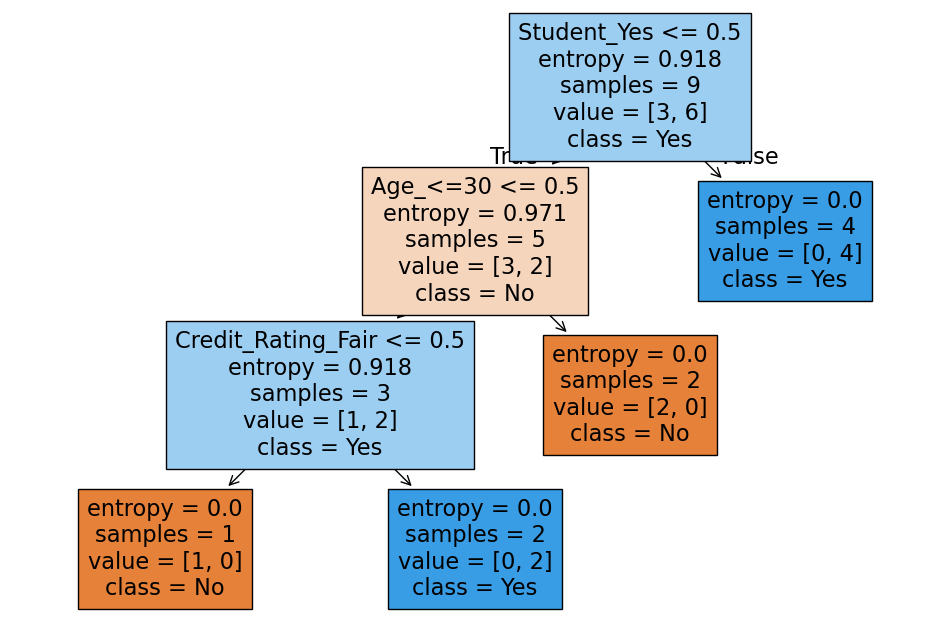

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

